# PARCIAL INTELIGENCIA ARTIFICIAL

**Cristian Puentes - T00060458** 

**Luis Alfredo de la Ossa - T00058743** 
    
  

In [79]:
#Importamos las librerias que nos permitiran evitar problemas sobre la ruta que dirige hacia los datos que se van a utilizar.
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA


'/home/aa3547a5-a4e0-41b2-ad88-68950920a745/sample-notebooks/data/'

In [80]:
#Importamos todos los datos necesarios para el uso de operaciones de algebra lineal, procesamiento de data y creacion de graficas.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from collections import Counter
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report

# ML
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn import tree

# File name
filename = DIR_DATA + 'Heart Disease Completado.csv'

# Información de atributos:
Para los 76 atributos que presentaban en comun los dataset, elegimos los 14 datos que consideramos reelevantes para su estudio debido a que brindan la informacion mas precisa para categorizar el diagnostico.

**age** - edad en años

**sex** - sexo do paciente
    
    0: mujer
 
    1: hombre
    
**cp** - tipo dolor torácica
    
    1: angina típica
    
    2: angina atípica
    
    3: dolor no cardiaco
    
    4: asintomático
    
**trestbps** - presión arterial en reposo

**chol** - colesterol sérico (mg/dl)

**fbs** - azúcar en sangre en ayunas > 120 mg/dl

    0: False
    
    1: True

**restecg** - resultado del electrocardiograma en reposo

    0: normales
    
    1: anomalías ST-T (inversión de la onda T y aumento o disminución de > 0,05 mV )
    
    2: hipertrofia ventricular izquierda probable o definitiva (según criterios de Romhilt-Estes)
    
**thalach** - frecuencia cardíaca máxima alcanzada

**exang** - angina inducida por el ejercicio

    0: no
    
    1: prueba

**oldpeak** - Descenso del segmento ST inducido por el ejercicio en relación con el reposo

**slope** - Pendiente del segmento ST en el ejercicio máximo

**ca** - número de vasos principais colorido por fluoroscopia

**thal** - prueba de esfuerzo con talio
    
    3: normales
    
    6: defecto fijo
    
    7: defecto reversible

**num** - diagnóstico de enfermedades del corazón (diagnóstico angiográfico)
    0: sin enfermedad cardiaca (< 50% de estrechamiento del diámetro)
    1,2,3,4: hay enfermedad cardíaca (> 50% de estrechamiento del diámetro)

# Lectura y analisis de datos:

# Información de atributos:

**age** - edad en años

**sex** - sexo do paciente
    
    0: mujer
 
    1: hombre
    
**cp** - tipo dolor torácica
    
    1: angina típica
    
    2: angina atípica
    
    3: dolor no cardiaco
    
    4: asintomático
    
**trestbps** - presión arterial en reposo

**chol** - colesterol sérico (mg/dl)

**fbs** - azúcar en sangre en ayunas > 120 mg/dl

    0: False
    
    1: True

**restecg** - resultado del electrocardiograma en reposo

    0: normales
    
    1: anomalías ST-T (inversión de la onda T y aumento o disminución de > 0,05 mV )
    
    2: hipertrofia ventricular izquierda probable o definitiva (según criterios de Romhilt-Estes)
    
**thalach** - frecuencia cardíaca máxima alcanzada

**exang** - angina inducida por el ejercicio

    0: no
    
    1: prueba

**oldpeak** - Descenso del segmento ST inducido por el ejercicio en relación con el reposo

**slope** - Pendiente del segmento ST en el ejercicio máximo

**ca** - número de vasos principais colorido por fluoroscopia

**thal** - prueba de esfuerzo con talio
    
    3: normales
    
    6: defecto fijo
    
    7: defecto reversible

**num** - diagnóstico de enfermedades del corazón (diagnóstico angiográfico)
    0: sin enfermedad cardiaca (< 50% de estrechamiento del diámetro)
    1,2,3,4: hay enfermedad cardíaca (> 50% de estrechamiento del diámetro)

# Lectura y analisis de datos:

In [81]:
#carga los datos del archivo CSV en un DataFrame   
df = pd.read_csv(filename)

In [82]:
#realiza un conteo de los valores únicos en la columna 'num' del DataFrame
df.num.value_counts()

 1.0      563
-9.0      275
 2.0       41
 162.0      1
 0.0        1
Name: num, dtype: int64

In [83]:
# convierte los valores >= 0 en 1
df.loc[df.num > 0, 'num'] = 1

In [84]:
# converterte los valores != 1 en 0
#esto lo hicimos considerando que los valores de ("-9") que estan en el DataSet son 0
df.loc[df.num != 1, 'num'] = 0

In [85]:
# cuenta la cantidad de ocurrencias de cada valor en la columna 'num' del DataFrame 
df.num.value_counts()

1.0    605
0.0    277
Name: num, dtype: int64

In [86]:
#muestra las primeras 5 filas del DataFrame con los 14 datos seleccionados
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,65,1,4,115,0,0,0,93,1,0.0,2,-9,7,1.0
1,32,1,1,95,0,-9,0,127,0,0.7,1,-9,-9,1.0
2,61,1,4,105,0,-9,0,110,1,1.5,1,-9,-9,1.0
3,50,1,4,145,0,-9,0,139,1,0.7,2,-9,-9,1.0
4,57,1,4,110,0,-9,1,131,1,1.4,1,1,-9,1.0


In [87]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,53.461451,0.791383,3.253968,122.560091,191.010204,-0.767574,0.581633,127.981859,-0.192744,0.173469,-1.989796,-5.984127,-2.543084,0.685941
std,9.427734,0.406550,0.927026,39.830334,116.888156,2.799252,0.921814,43.434867,2.321306,2.731175,5.162612,4.534366,7.119609,0.464403
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,160.000000,0.000000,0.000000,114.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,222.000000,0.000000,0.000000,136.000000,0.000000,0.200000,1.000000,-9.000000,-9.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,155.000000,1.000000,1.500000,2.000000,0.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,1.000000


In [88]:
# muestra información sobre el DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       882 non-null    int64  
 1   sex       882 non-null    int64  
 2   cp        882 non-null    int64  
 3   trestbps  882 non-null    int64  
 4   chol      882 non-null    int64  
 5   fbs       882 non-null    int64  
 6   restecg   882 non-null    int64  
 7   thalach   882 non-null    int64  
 8   exang     882 non-null    int64  
 9   oldpeak   882 non-null    float64
 10  slope     882 non-null    int64  
 11  ca        882 non-null    int64  
 12  thal      882 non-null    int64  
 13  num       882 non-null    float64
dtypes: float64(2), int64(12)
memory usage: 96.6 KB


# Correlation Between Features

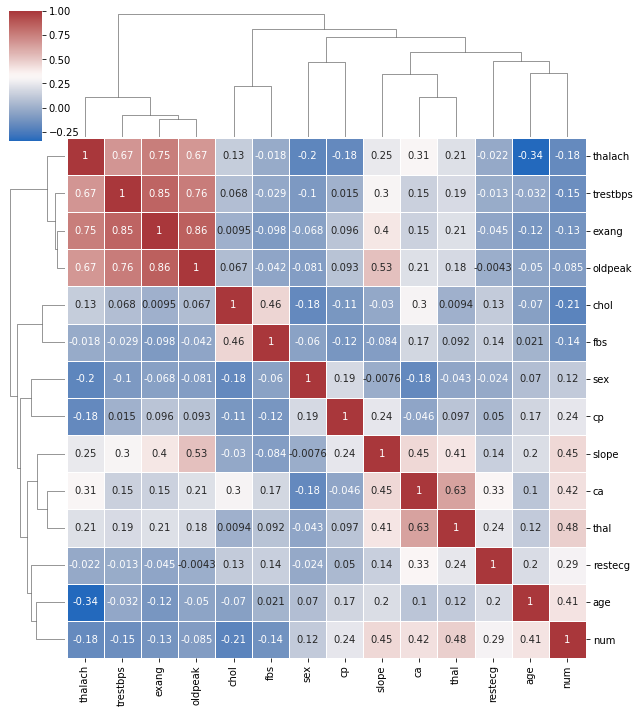

In [89]:
#creamos un gráfico de mapa de clúster utilizando la biblioteca Seaborn (sns) en base a las correlaciones de las columnas del DataFrame
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
#Mostramos la grafica
plt.show()

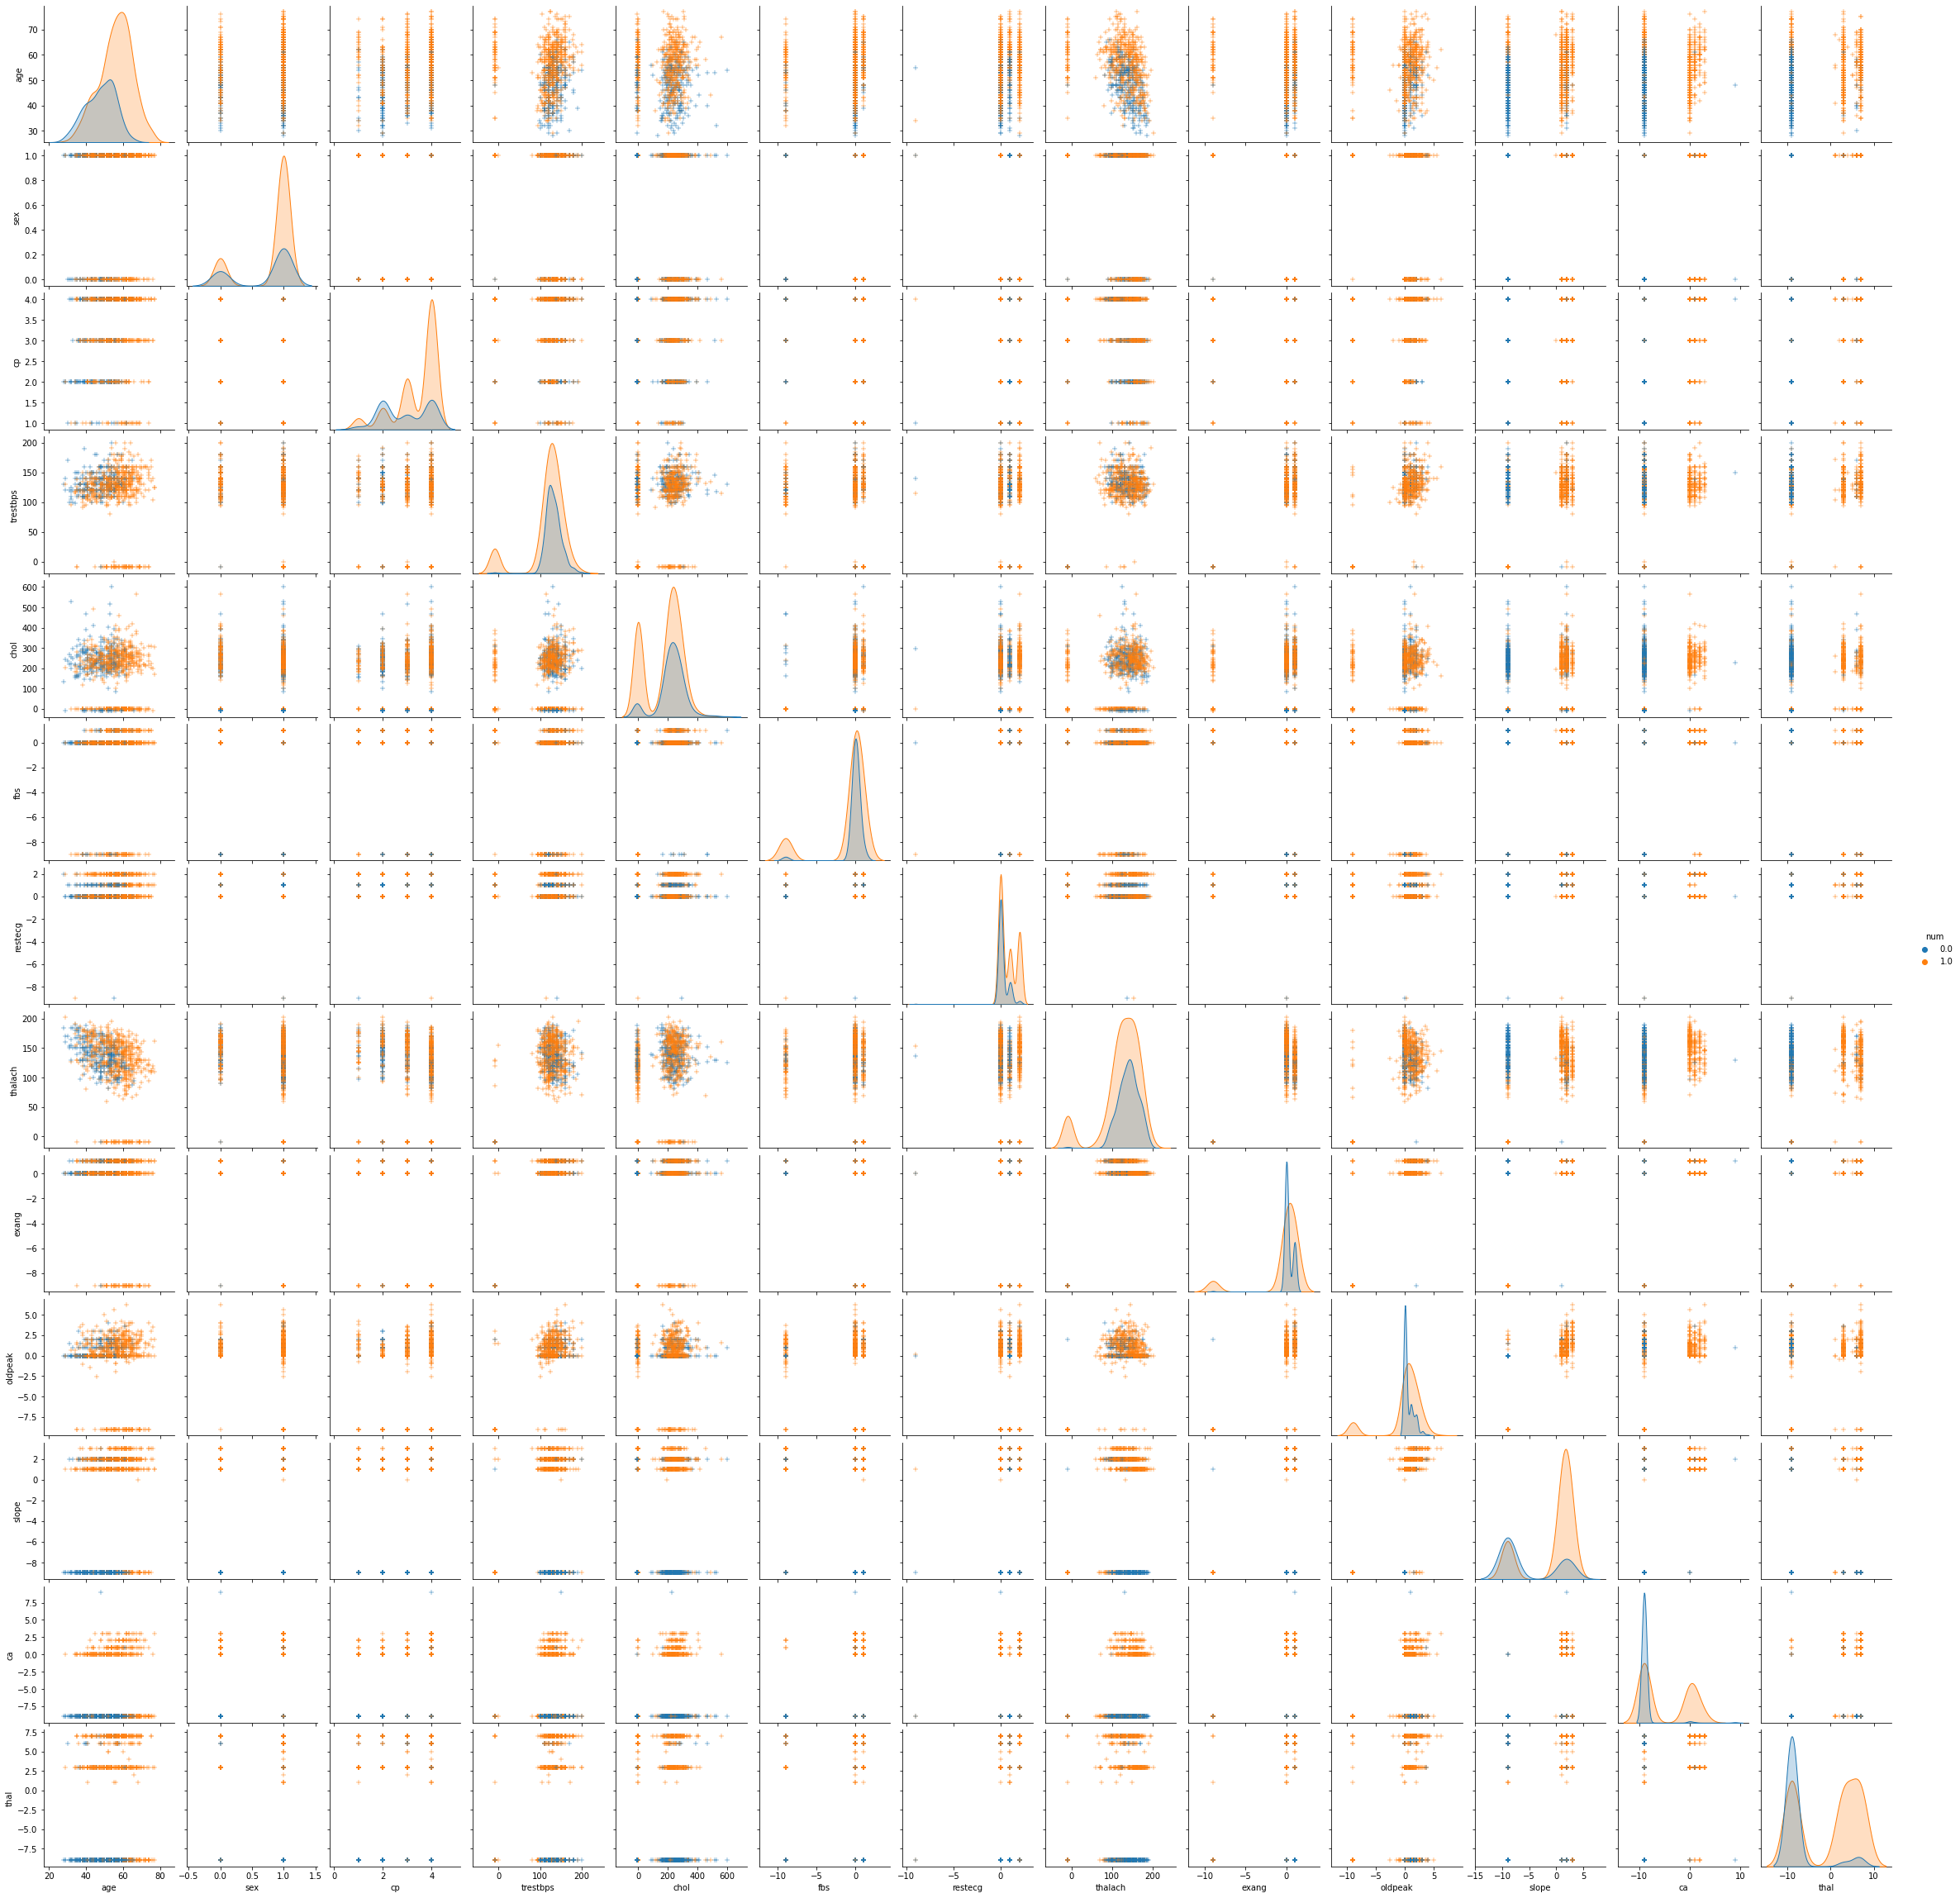

In [90]:
#creamos  un gráfico de pares utilizando la biblioteca Seaborn (sns) en base al DataFrame, basicamente es el mismo grafico que el anterior el cual muestra la coorelacion de las variables utilizadas
g = sns.pairplot(df, hue='num', markers='+')
#Mostramos la grafica
plt.show()

# Preprocessing: Missing Value Problem

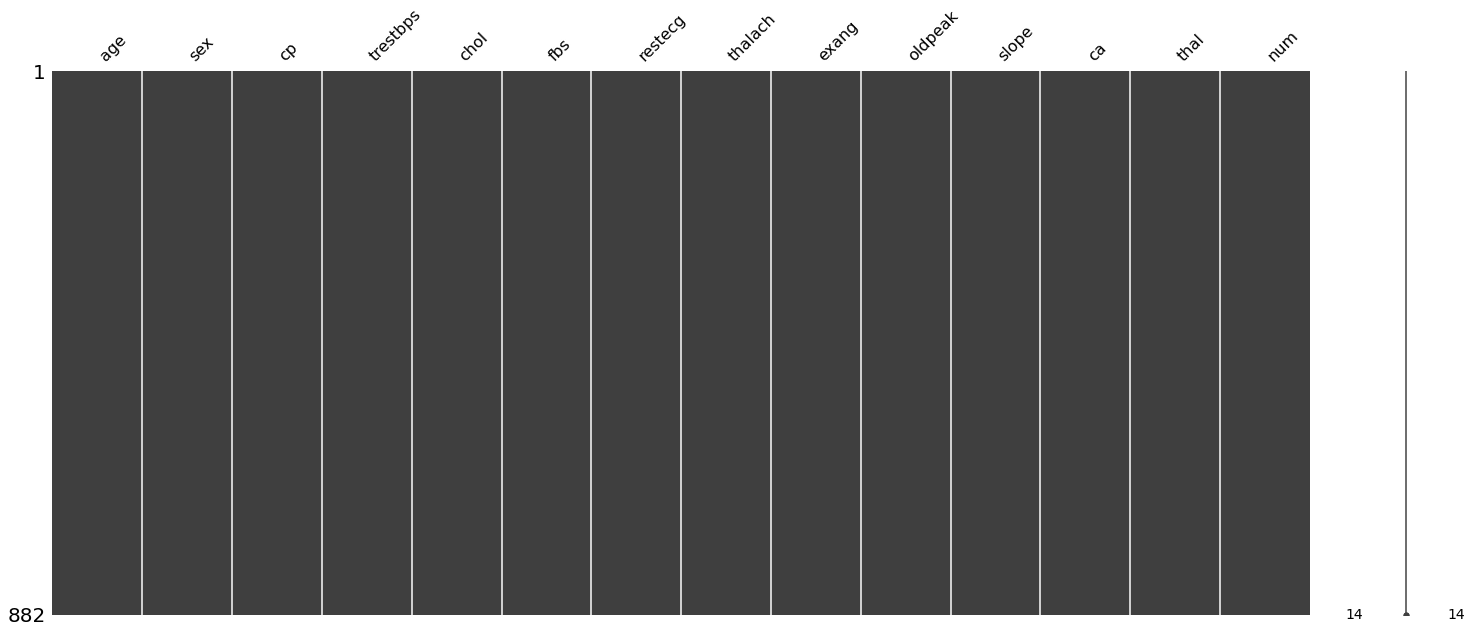

In [91]:
#creamos una matriz de visualización de la ausencia de datos parasaber si faltan datos en nuestro DatasFrame
msno.matrix(df)
#Mostramos la grafica
plt.show()


In [92]:
#Creamos y mostramos un listado de lo representado en la grafica, vemos como no existe ningun valor faltante en cada atributo.
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [93]:
# Utilizamos esto para en caso de que no exitstan valores se rellenen.
df["num"].fillna(value = df["num"].mean(), inplace =True)

In [94]:
#Mostramos el listado del numero de valores rellenados en cada atributo, sin embargo como no se encontraron datos faltantes no se ralizó ningun rellenado.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Preprocessing: Train-Test Split and Normalization

In [95]:
# creamos un nuevo DataFrame en la variable x a partir del DataFrame de todos los datos excluyendo la columna "num". 
x = df.drop("num", axis=1).values
#creamos un nuevo arreglo en la variable y, a partir de la columna "num" del DataFrame
y = df["num"].values

In [96]:
#contamos la frecuencia de cada valor en la variable y, y lo ordenamos en una tupla dentro de una lista
sorted(Counter(y).items())
#El resultado que obtenemos nos muestra  desbalance de clases, donde la clase 1.0 (personas con enfermedad cardíaca) tiene una cantidad significativamente mayor de instancias
#en comparación con la clase 0.0 (personas sin enfermedad cardíaca). Dandonos a entender que existe un sesgo en el DataFrame y este puede afectar la precision de la veracidad de los datos

[(0.0, 277), (1.0, 605)]

In [97]:
# Dividimos los datos para poder distribuirlos en funcion de prueba y entrenamiento.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
#Los valores obtenidos nos muestran la cantidad de valores distribuidos para cada tipo, en este caso tenemos 617 para entrenamiento y 265 para prueba.

x_train (617, 13)
x_test (265, 13)
y_train (617,)
y_test (265,)


In [98]:
# Creamos una lista para los datos de entrenamiento de la variable y en donde tenemos que para la clase 0.0 existen 1199 muestras mientras que para la clase 1.0 tenemos 418 muestras 
#evidenciandose asi la diferencia entre clases mostrando una diferencia grande en dichas clases
sorted(Counter(y_train).items())

[(0.0, 199), (1.0, 418)]

In [99]:
# Hacemos lo mismo pero con los datos de prueba y tenemos que para la clase  0.0 existen 78 muestras mientras que en la clase 0.1 existen 187 muestras
#Siendo una diferencia bastante menor comparandola con el resultado anterior.
sorted(Counter(y_test).items())

[(0.0, 78), (1.0, 187)]

# Over Sampler
para reducir este sesgo que existen entre los valores de prueba con los valores de entrenamiento, recurrimos a la tecnica de reemuestreo con el fin de tener mayor precision y reducir el sesgo.

In [100]:
#duplicamos aleatoriamente las muestras de la clase minoritaria para que haya una cantidad similar de muestras para ambas clases.
ros_train = RandomOverSampler(random_state=1000)
xx_train, yy_train  = ros_train.fit_resample(x_train, y_train)

In [101]:
# Datos de entrenamiento balanceados
sorted(Counter(yy_train).items())

[(0.0, 418), (1.0, 418)]

In [102]:
#Aplicamos el mismo duplicado para los calores de prueba.
ros_test = RandomOverSampler(random_state=1000)
xx_test, yy_test = ros_test.fit_resample(x_test, y_test)

In [103]:
# Datos de prueba balanceados
sorted(Counter(yy_test).items())

[(0.0, 187), (1.0, 187)]

In [104]:
# Realizamos una normalización de los datos utilizando la técnica de min-max normalization.
x_train_max =np.max(xx_train)
x_train_min =np.min(xx_train)
xx_train= (xx_train - x_train_min)/(x_train_max-x_train_min)
xx_test= (xx_test - x_train_min)/(x_train_max-x_train_min)

# Modelling

# Overfitting

Implementamos un modelo de Regresión Logística basado en el algoritmo Stochastic Gradient Descent (SGD) para clasificar los datos. El modelo se evaluará utilizando una validación cruzada con 10 particiones (k-fold) en el conjunto de datos de entrenamiento (xx_train y yy_train).

Las métricas de evaluación reportadas son la precisión (accuracy) y la precisión promedio (precision) del modelo en las diferentes particiones de validación cruzada. La precisión es una medida de la proporción de predicciones correctas realizadas por el modelo, mientras que la precisión promedio es la precisión promedio ponderada por clase.



In [105]:
k_fold = ShuffleSplit(n_splits=10, test_size=0.30, random_state=42)

In [106]:
#Aplicamos el modelo de regrecion logistica en escogido, en nuestro caso es SGD
models = [("Logistic Regression", SGDClassifier(loss="log", penalty="l2"))] 

En base a los resultados obtenidos, se puede concluir lo siguiente:

Precisión (Accuracy): El modelo de Regresión Logística con SGD ha obtenido una precisión promedio de 0.75 en las 10 particiones de validación cruzada. Esto indica que, en promedio, el modelo clasifica correctamente aproximadamente el 75% de las muestras en el conjunto de datos de entrenamiento. Sin embargo, es importante tener en cuenta que la precisión puede no ser la mejor métrica de evaluación en casos de desequilibrio de clases, ya que puede verse afectada por la distribución de las clases en el conjunto de datos.

Precisión promedio (Precision): El modelo también ha obtenido una precisión promedio de 0.78 en las 10 particiones de validación cruzada. Esto indica que, en promedio, el modelo tiene un rendimiento aceptable en la precisión de predicción promedio ponderada por clase en el conjunto de datos de entrenamiento.


In [107]:
finalResults = []
for name, model in models:
    accuracies = []
    precisions = []
    for train_index, test_index in k_fold.split(xx_train, yy_train):
        data_train = xx_train[train_index]
        target_train = yy_train[train_index]

        data_test = xx_train[test_index]
        target_test = yy_train[test_index]

        model.fit(data_train, target_train)
        predict = model.predict(data_test)
        # Accuracy
        accuracy = accuracy_score(target_test, predict)
        accuracies.append(accuracy)
        # Precision
        precision = precision_score(target_test, predict, average='macro')
        precisions.append(precision)
       
    finalResults.append({'name':name, 'accuracy': round(np.mean(accuracies), 2), 'precision': round(np.mean(precisions), 2)})
finalResults

[{'name': 'Logistic Regression', 'accuracy': 0.76, 'precision': 0.79}]

In [108]:
#Mostramos los datos obtenidos sobre la precision y el accuracy.
df_result = pd.DataFrame.from_dict(finalResults)
df_result

,name,accuracy,precision
0,Logistic Regression,0.76,0.79


In [109]:
#Creamos la matriz de confucion con los datos balanceados y normalizados
y_predict = model.predict(xx_test)
cm = confusion_matrix(yy_test, y_predict)

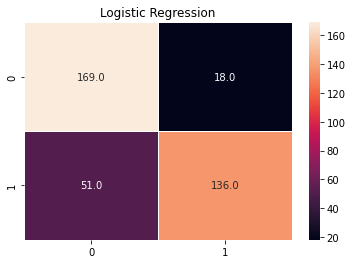

In [110]:
#Hacemos la configuracion para el color, margenes y formato de la grafica
plt.figure()
sns.heatmap(cm , annot =True, linewidth=0.8,fmt=".1f")
plt.title("Logistic Regression")
#Mostramos la grafica
plt.show()

# Classification report

In [111]:
print(classification_report(yy_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       187
         1.0       0.88      0.73      0.80       187

    accuracy                           0.82       374
   macro avg       0.83      0.82      0.81       374
weighted avg       0.83      0.82      0.81       374



Precisión (Precision): La precisión se refiere a la proporción de predicciones correctas realizadas por el modelo, el modelo ha obtenido una precisión del 0.97 para la clase 0 (etiqueta 0.0) y del 0.72 para la clase 1 (etiqueta 1.0). Esto indica que el modelo tiene un rendimiento alto en términos de precisión para la clase 0, con un 97% de predicciones correctas, pero un rendimiento un poco más bajo para la clase 1, con un 72% de predicciones correctas.

Recall (Recuperación o Sensibilidad): El recall se refiere a la proporción de muestras positivas que son correctamente identificadas por el modelo, el modelo ha obtenido un recall del 0.63 para la clase 0 y del 0.98 para la clase 1. Esto indica que el modelo tiene un rendimiento más bajo en términos de recall para la clase 0, con un 63% de muestras positivas correctamente identificadas, pero un rendimiento alto para la clase 1, con un 98% de muestras positivas correctamente identificadas.

F1-score: El F1-score es una medida que combina la precisión y el recall en una sola métrica, calculando su media armónica, el modelo ha obtenido un F1-score del 0.76 para la clase 0 y del 0.83 para la clase 1. Esto indica que el modelo tiene un rendimiento moderado en términos de F1-score para la clase 0, con un 76% de balance entre precisión y recall, y un rendimiento alto para la clase 1, con un 83% de balance entre precisión y recall.

Exactitud (Accuracy): La exactitud se refiere a la proporción de predicciones correctas realizadas por el modelo en general, el modelo ha obtenido una exactitud del 0.80 en el conjunto de datos de prueba, lo que indica que aproximadamente el 80% de las predicciones realizadas por el modelo son correctas.

En general, los resultados indican que el modelo de Regresión Logística implementado tiene un rendimiento aceptable en términos de precisión, recall, F1-score y exactitud en el conjunto de datos de prueba.